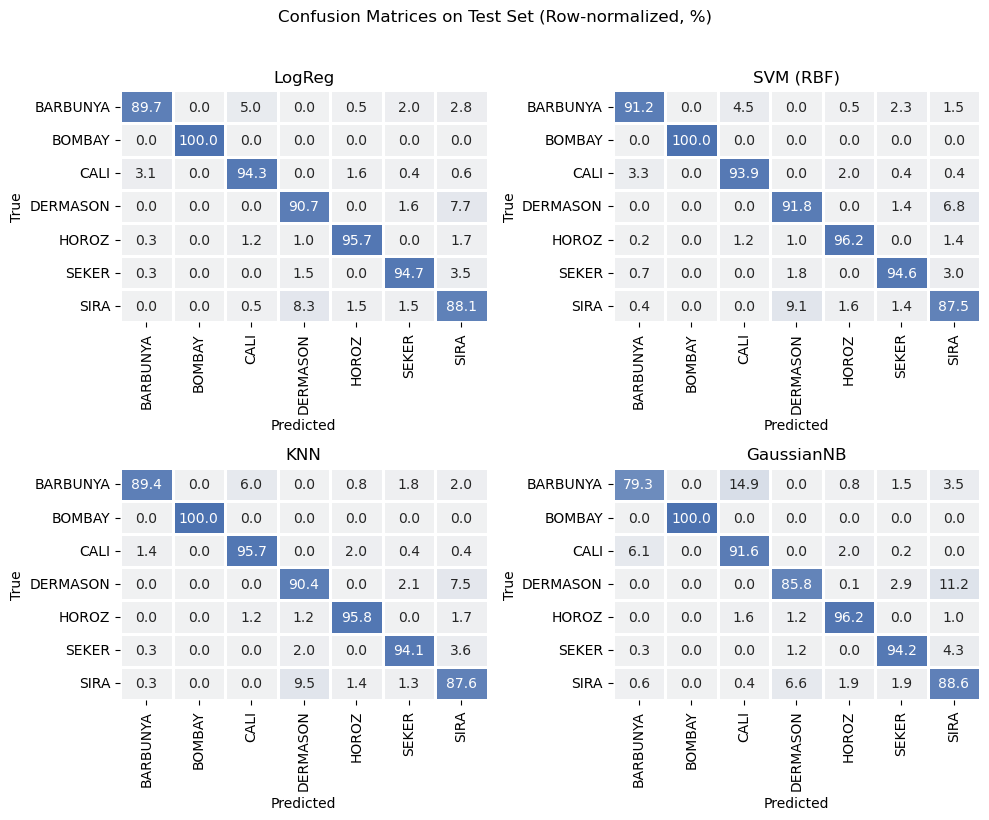

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# ===== 0) Load data =====
df = pd.read_excel('YOUR DATA PATH')
CLASS_COL = "Class"                 

X = df.drop(columns=[CLASS_COL])
y = df[CLASS_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

class_names = sorted(y.unique()) 


# ===== 1) Models with your tuned hyperparams =====
models = {
    "LogReg": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(C=5, solver="lbfgs", max_iter=2000))
    ]),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(C=5, gamma="auto", kernel="rbf"))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=15, p=2, weights="distance"))
    ]),
    "GaussianNB": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", GaussianNB(var_smoothing=1e-9)
         )
    ]),   
}



fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, (name, pipe) in zip(axes, models.items()):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

    sns.heatmap(
        cm_percent,
        annot=True,
        fmt=".1f",
        cmap=sns.light_palette("#4C72B0", as_cmap=True),
        xticklabels=class_names,
        yticklabels=class_names,
        cbar=False,
        linewidths=0.8,
        linecolor="white",
        ax=ax
    )

    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.suptitle("Confusion Matrices on Test Set (Row-normalized, %)", y=1.02)
plt.tight_layout()
plt.show()


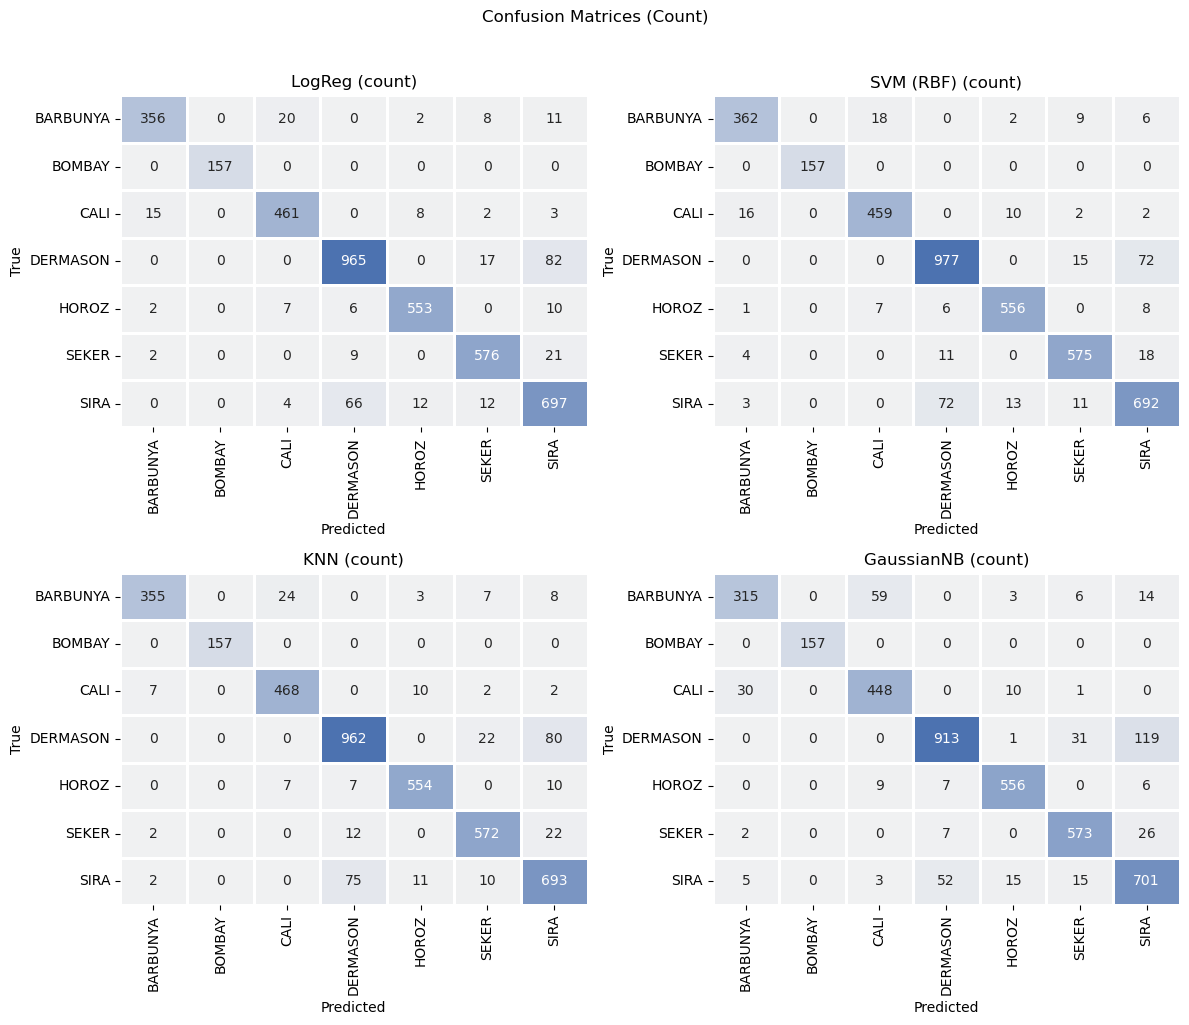

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (name, pipe) in zip(axes, models.items()):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=class_names)

    sns.heatmap(
        cm,                    
        annot=True,
        fmt="d",                 
        cmap=sns.light_palette("#4C72B0", as_cmap=True),
        xticklabels=class_names,
        yticklabels=class_names,
        cbar=False,
        linewidths=0.8,
        linecolor="white",
        ax=ax
    )

    ax.set_title(f"{name} (count)")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.suptitle("Confusion Matrices (Count)", y=1.02)
plt.tight_layout()
plt.show()
